# New section

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv("data.csv")

In [4]:
file.head()

,Issue key,Issue id,Status,Created,Creator,Updated,Assignee,Summary,Custom field (How It Happened? ( Root Cause)),Custom field (How I Fixed (Resolution Provided)),Environment,Custom field (Test Type),Custom field (Feature Link),Custom field (Closed Date),Custom field (Defect Type)
0,INSBBOS-550,357651,Closed,12/6/2023 8:51,463021,13/6/2023 16:20,463021,[QUEST-6701/QUEST-8449/INSBBOS-550] #Defect 4:...,This CR testing does not involve Motor-Others ...,Test Cases has been changed to Motor from Moto...,NaN,UAT,INSBBOS-318,13/6/2023 16:20,Program Error
1,INSBFOS-1404,367678,Closed,6/7/2023 14:00,463021,8/7/2023 2:02,463021,[QUEST-11345/INSBFOS-1404] #Defect 1: Diamond ...,DB scripts are not available in database level.,Executed required DB script related to marine ...,NaN,Operation Readiness Test (ORT),INSBFOS-1213,7/7/2023 17:40,Program Error
2,INSBBOS-546,353667,Closed,6/6/2023 11:14,463021,12/6/2023 10:17,463021,[QUEST-6701/QUEST-8449/INSBBOS-546] #Defect 2:...,It is due to GIS DB password expired. Its not ...,SA to change the password,NaN,UAT,INSBBOS-318,12/6/2023 10:17,Program Error
3,INSBBOS-509,346162,Closed,23/5/2023 10:29,463021,12/6/2023 11:18,C005013,[QUEST-6701/QUEST-8449/INSBBOS-509] #Defect 1:...,The integration job couldn’t able to succeed a...,recompile the program to let the table structu...,NaN,UAT,INSBBOS-318,12/6/2023 11:18,Program Error
4,INSBBOS-578,374635,Closed,25/7/2023 9:58,463021,27/7/2023 17:13,C005013,[QUEST-6701/QUEST-8449/INSBBOS-578] #Defect 1:...,comp file have missing program (4go).,recompile the auto endorsement program.,NaN,Operation Readiness Test (ORT),INSBBOS-318,27/7/2023 17:13,Program Error


In [5]:
stats = ['Assigned', 'Closed', 'New', 'READY FOR TEST', 'Rejected', 'Review In Progress']
filter = file[file['Status'].isin(stats)]
count = filter['Status'].value_counts()

for status, count in count.items():
    print(f"Number of '{status}' occurrences: {count}")

Number of 'Closed' occurrences: 199
Number of 'New' occurrences: 17
Number of 'Rejected' occurrences: 6
Number of 'READY FOR TEST' occurrences: 3
Number of 'Assigned' occurrences: 2


Check missing value

In [6]:
for column in file.columns:
    missing_count = file[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s)")

Column 'Issue key' has 0 missing value(s)
Column 'Issue id' has 0 missing value(s)
Column 'Status' has 0 missing value(s)
Column 'Created' has 0 missing value(s)
Column 'Creator' has 0 missing value(s)
Column 'Updated' has 0 missing value(s)
Column 'Assignee' has 0 missing value(s)
Column 'Summary' has 0 missing value(s)
Column 'Custom field (How It Happened? ( Root Cause))' has 29 missing value(s)
Column 'Custom field (How I Fixed (Resolution Provided))' has 25 missing value(s)
Column 'Environment' has 235 missing value(s)
Column 'Custom field (Test Type)' has 64 missing value(s)
Column 'Custom field (Feature Link)' has 41 missing value(s)
Column 'Custom field (Closed Date)' has 36 missing value(s)
Column 'Custom field (Defect Type)' has 9 missing value(s)


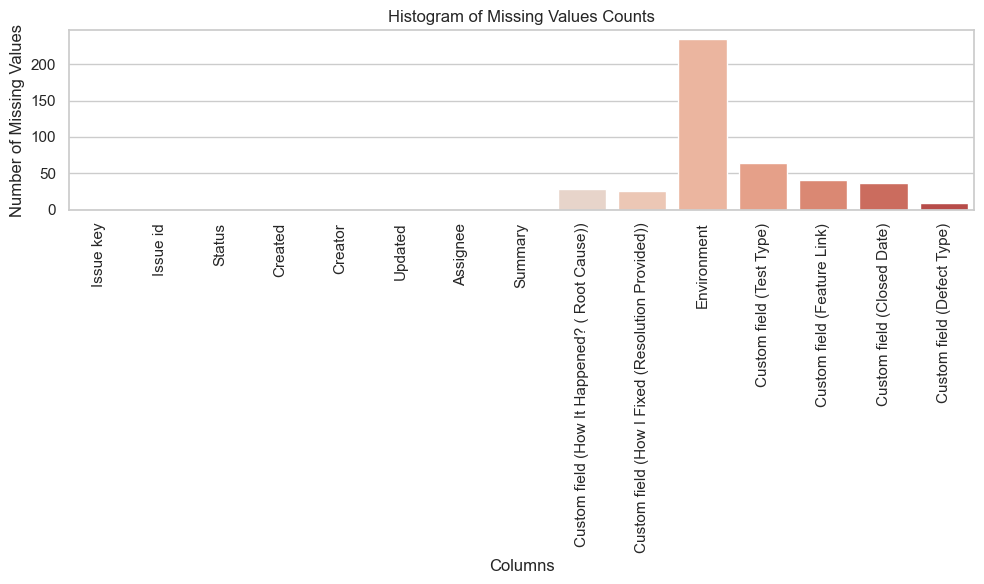

In [7]:
missing_counts = file.isnull().sum()

sns.set(style='whitegrid')

# Create a barplot of missing values counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values Counts')
plt.tight_layout()

plt.show()

Drop missing column where data is all NA

In [8]:
df = file.drop('Environment', axis=1)
df.head(5)

,Issue key,Issue id,Status,Created,Creator,Updated,Assignee,Summary,Custom field (How It Happened? ( Root Cause)),Custom field (How I Fixed (Resolution Provided)),Custom field (Test Type),Custom field (Feature Link),Custom field (Closed Date),Custom field (Defect Type)
0,INSBBOS-550,357651,Closed,12/6/2023 8:51,463021,13/6/2023 16:20,463021,[QUEST-6701/QUEST-8449/INSBBOS-550] #Defect 4:...,This CR testing does not involve Motor-Others ...,Test Cases has been changed to Motor from Moto...,UAT,INSBBOS-318,13/6/2023 16:20,Program Error
1,INSBFOS-1404,367678,Closed,6/7/2023 14:00,463021,8/7/2023 2:02,463021,[QUEST-11345/INSBFOS-1404] #Defect 1: Diamond ...,DB scripts are not available in database level.,Executed required DB script related to marine ...,Operation Readiness Test (ORT),INSBFOS-1213,7/7/2023 17:40,Program Error
2,INSBBOS-546,353667,Closed,6/6/2023 11:14,463021,12/6/2023 10:17,463021,[QUEST-6701/QUEST-8449/INSBBOS-546] #Defect 2:...,It is due to GIS DB password expired. Its not ...,SA to change the password,UAT,INSBBOS-318,12/6/2023 10:17,Program Error
3,INSBBOS-509,346162,Closed,23/5/2023 10:29,463021,12/6/2023 11:18,C005013,[QUEST-6701/QUEST-8449/INSBBOS-509] #Defect 1:...,The integration job couldn’t able to succeed a...,recompile the program to let the table structu...,UAT,INSBBOS-318,12/6/2023 11:18,Program Error
4,INSBBOS-578,374635,Closed,25/7/2023 9:58,463021,27/7/2023 17:13,C005013,[QUEST-6701/QUEST-8449/INSBBOS-578] #Defect 1:...,comp file have missing program (4go).,recompile the auto endorsement program.,Operation Readiness Test (ORT),INSBBOS-318,27/7/2023 17:13,Program Error


In [9]:
# fill in the NA values with TBD in all column
for col in df.columns:
  df[col].fillna("TBD", inplace = True)

# check if its any missing value
print(df.isnull().sum())

# df.to_csv("new.csv")


Issue key                                           0
Issue id                                            0
Status                                              0
Created                                             0
Creator                                             0
Updated                                             0
Assignee                                            0
Summary                                             0
Custom field (How It Happened? ( Root Cause))       0
Custom field (How I Fixed (Resolution Provided))    0
Custom field (Test Type)                            0
Custom field (Feature Link)                         0
Custom field (Closed Date)                          0
Custom field (Defect Type)                          0
dtype: int64


Rename column name and drop unrelated column

In [10]:
# drop Created, Updated, Assignee, Closed Date,
# Custom field (How It Happened? ( Root Cause)), Custom field (How I Fixed (Resolution Provided))
dropCol = [
    'Created', 'Updated', 'Assignee', 'Custom field (Closed Date)',
    'Custom field (How It Happened? ( Root Cause))', 'Custom field (How I Fixed (Resolution Provided))'
]

df.drop(dropCol, axis=1, inplace=True)

df.head(5)

,Issue key,Issue id,Status,Creator,Summary,Custom field (Test Type),Custom field (Feature Link),Custom field (Defect Type)
0,INSBBOS-550,357651,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-550] #Defect 4:...,UAT,INSBBOS-318,Program Error
1,INSBFOS-1404,367678,Closed,463021,[QUEST-11345/INSBFOS-1404] #Defect 1: Diamond ...,Operation Readiness Test (ORT),INSBFOS-1213,Program Error
2,INSBBOS-546,353667,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-546] #Defect 2:...,UAT,INSBBOS-318,Program Error
3,INSBBOS-509,346162,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-509] #Defect 1:...,UAT,INSBBOS-318,Program Error
4,INSBBOS-578,374635,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-578] #Defect 1:...,Operation Readiness Test (ORT),INSBBOS-318,Program Error


In [11]:
# Rename Column name
newCol ={
    'Custom field (Test Type)' : 'Test Type',
    'Custom field (Feature Link)' : 'Feature Type',
    'Custom field (Defect Type)' : 'Defect Type'
}

df.rename(columns=newCol, inplace=True)
df.head(5)

,Issue key,Issue id,Status,Creator,Summary,Test Type,Feature Type,Defect Type
0,INSBBOS-550,357651,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-550] #Defect 4:...,UAT,INSBBOS-318,Program Error
1,INSBFOS-1404,367678,Closed,463021,[QUEST-11345/INSBFOS-1404] #Defect 1: Diamond ...,Operation Readiness Test (ORT),INSBFOS-1213,Program Error
2,INSBBOS-546,353667,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-546] #Defect 2:...,UAT,INSBBOS-318,Program Error
3,INSBBOS-509,346162,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-509] #Defect 1:...,UAT,INSBBOS-318,Program Error
4,INSBBOS-578,374635,Closed,463021,[QUEST-6701/QUEST-8449/INSBBOS-578] #Defect 1:...,Operation Readiness Test (ORT),INSBBOS-318,Program Error


In [27]:
dropped = [
    'Formatted Summary', 'QuestNumbers'
]
df.drop(dropped, axis=1, inplace=True)

In [30]:
import re

# Define a function to extract Quest Numbers from text
def extract_quest_numbers(text):
    pattern = r'\[QUEST-\d+/\w+-\d+(?:/\w+-\d+)*\]'
    quest_numbers = re.findall(pattern, text)
    return ', '.join(quest_numbers)

# Apply the extract_quest_numbers function to the 'Summary' column
df['Quest Numbers'] = df['Summary'].apply(extract_quest_numbers)

# Display the DataFrame with the extracted Quest Numbers
# print(df[['Summary', 'Quest Numbers']])
df.head(5)

,Issue key,Issue id,Status,Creator,Summary,Test Type,Feature Type,Defect Type,Quest Numbers
0,INSBBOS-550,357651,Closed,463021,QUEST-6701/QUEST-8449/INSBBOS-550 #Defect 4: J...,UAT,INSBBOS-318,Program Error,
1,INSBFOS-1404,367678,Closed,463021,QUEST-11345/INSBFOS-1404 #Defect 1: Diamond co...,Operation Readiness Test (ORT),INSBFOS-1213,Program Error,
2,INSBBOS-546,353667,Closed,463021,QUEST-6701/QUEST-8449/INSBBOS-546 #Defect 2: C...,UAT,INSBBOS-318,Program Error,
3,INSBBOS-509,346162,Closed,463021,QUEST-6701/QUEST-8449/INSBBOS-509 #Defect 1: C...,UAT,INSBBOS-318,Program Error,
4,INSBBOS-578,374635,Closed,463021,QUEST-6701/QUEST-8449/INSBBOS-578 #Defect 1: E...,Operation Readiness Test (ORT),INSBBOS-318,Program Error,


In [3]:
import re

# Define a regular expression pattern to capture text within square brackets
pattern = r'\[(.*?)\]'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('new.csv')

# Create a list to store the modified Summary column
modified_summary = []

# Iterate through the rows to modify the "Summary" column and add a new column
for index, row in df.iterrows():
    summary_text = row['Summary']

    # Find all matches of the pattern in the summary text
    matches = re.findall(pattern, summary_text)
    # If there are Quest Numbers, use the first one, else use 'TBD'
    if matches:
        parts = matches[0].split('/')
        if parts and parts[0].startswith('Q'):
            # Remove text after '|' character, if it exists
            quest = parts[0].split('|')[0]
            modified_summary.append(quest)
        else:
            modified_summary.append('TBD')
    else:
        modified_summary.append('TBD')

# Add the modified summary as a new column
df['Modified Summary'] = modified_summary

# Define the name of the new CSV file
new_csv_file = 'modified_new.csv'

# Save the DataFrame to a new CSV file
df.to_csv('modified_new.csv', index=False, encoding='utf-8')

print(f"Modified data saved to {new_csv_file}")

Modified data saved to modified_new.csv


In [ ]:
# df.to_csv("new.csv")